In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
np.random.seed(42)

x = np.random.uniform(-10, 10, 1000)
y = 2 * x**2 + x + 7
noise = np.random.normal(0, 5, size=x.shape)
z = y + noise
X = x.reshape(-1, 1)
y_target = z
degrees = [1, 2, 3, 5, 10]
k = 5  
cv_errors = []

In [4]:
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    neg_mse_scores = cross_val_score(model, X_poly, y_target, cv=k, scoring='neg_mean_squared_error')
    mse = -np.mean(neg_mse_scores)
    cv_errors.append(mse)
    print(f"Degree {degree}: Mean CV MSE = {mse}")

Degree 1: Mean CV MSE = 3606.522340988443
Degree 2: Mean CV MSE = 24.511586899273617
Degree 3: Mean CV MSE = 24.535034146668295
Degree 5: Mean CV MSE = 24.507503543438258
Degree 10: Mean CV MSE = 24.551074555076703


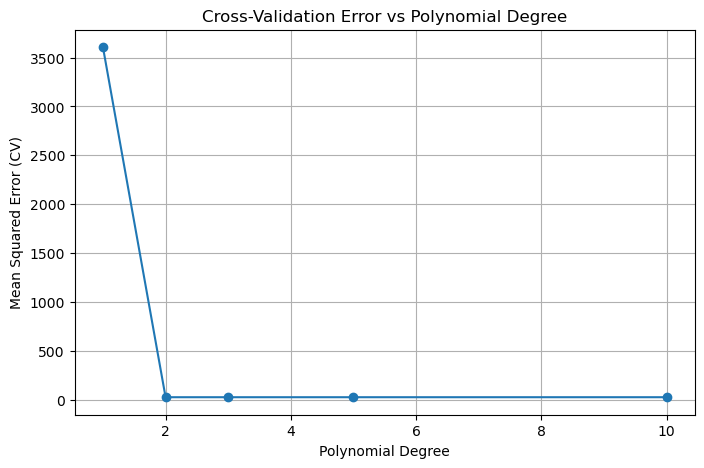

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_errors, marker='o')
plt.title("Cross-Validation Error vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (CV)")
plt.grid(True)
plt.show()